IMPORT THE LIBRARIES

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [130]:
df=pd.read_csv('blinkit_dataset.csv')

In [131]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


UNDERSTANDING THE COLUMNS

In [132]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

OBSERVATION:

Item Fat Content – Fat level of the product (e.g., Low Fat, Regular).

Item Identifier – Unique code for each product.

Item Type – Category of the product (e.g., Dairy, Snacks).

Outlet Establishment Year – Year when the store/outlet was established.

Outlet Identifier – Unique code for each outlet/store.

Outlet Location Type – Tier/location of outlet (Tier 1/2/3).

Outlet Size – Size of the outlet (Small, Medium, High).

Outlet Type – Type of store (e.g., Supermarket Type1),Grocery type.

Item Visibility – Percentage of product visible in the store.

Item Weight – Weight of the product in kilograms.

Sales – Total sales of the product in a specific outlet.

Rating – Product or customer rating (if available).

Get the column information

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [134]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

missing data: Item weight

                                         DATA CLEANING                                                                                    

1. CHECK AND REMOVE THE DUPLICATES

In [135]:
df.duplicated().any()

np.False_

OBSERVATION:  No duplicate values

2. HANDLE THE MISSING VALUES

In [136]:
Item_weight_mean=df['Item Weight'].mean()
df['Item Weight']=df['Item Weight'].fillna('Item_weight_mean')


In [137]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

3.check and correct the invalid dtype

In [138]:
df.dtypes 

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                   object
Sales                        float64
Rating                       float64
dtype: object

Observation:

change the datatype of Outlet Establishment Year column

In [139]:
df['Outlet Establishment Year'] = df['Outlet Establishment Year'].astype(str)

                                      DATA TRANSFORMATION                                                                                  

1. Replacing the values pesent in the Item Fat Content

In [140]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [141]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                       'low fat':'Low Fat',
                                                       'reg':'Regular'})

In [142]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


2.Renaming  the values present in the Outlet Location Type

In [143]:
df['Outlet Location Type'] = df['Outlet Location Type'].replace({
    'Tier 1': 'Urban',
    'Tier 2': 'Semi-Urban',
    'Tier 3': 'Rural'
})
df['Outlet Location Type']


0            Urban
1            Rural
2            Urban
3            Rural
4       Semi-Urban
           ...    
8518         Rural
8519         Rural
8520         Rural
8521         Rural
8522         Rural
Name: Outlet Location Type, Length: 8523, dtype: object

3. Renaming the labels in Outlet Type

In [144]:
df['Outlet Type'] = df['Outlet Type'].replace({
    'Supermarket Type1': 'Small Supermarket',
    'Supermarket Type2': 'Medium Supermarket',
    'Supermarket Type3': 'Large Supermarket',
})
df['Outlet Type']

0        Small Supermarket
1       Medium Supermarket
2        Small Supermarket
3        Small Supermarket
4        Small Supermarket
               ...        
8518     Large Supermarket
8519     Large Supermarket
8520     Large Supermarket
8521     Large Supermarket
8522     Large Supermarket
Name: Outlet Type, Length: 8523, dtype: object

                                    ANALYSIS                                                

1.Distribution of Item fat content

In [145]:
df['Item Fat Content'].value_counts() 

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

2.What are the total sales by Outlet Location Type?

In [146]:
sales_by_loc = df.groupby('Outlet Location Type')['Sales'].sum().reset_index() 
sales_by_loc 

,Outlet Location Type,Sales
0,Rural,472133.0272
1,Semi-Urban,393150.6416
2,Urban,336397.8120


3.Number of Item sold

In [147]:
df['Sales'].shape[0]

8523

4.Total sales by Item type

In [148]:
sales_by_itype=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
sales_by_itype

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

5.fat content by outlet for total sales

In [149]:
df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum()

Outlet Location Type  Item Fat Content
Rural                 Low Fat             306806.9924
                      Regular             165326.0348
Semi-Urban            Low Fat             254464.7734
                      Regular             138685.8682
Urban                 Low Fat             215047.9126
                      Regular             121349.8994
Name: Sales, dtype: float64

6.Trend of total sales over the years

In [150]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum()
sales_by_year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64

7. How is Sales affected by Outlet Size?

In [151]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
sales_by_size

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64

8.What is the count of different Outlet Types?

In [152]:
df['Outlet Type'].value_counts()

Outlet Type
Small Supermarket     5577
Grocery Store         1083
Large Supermarket      935
Medium Supermarket     928
Name: count, dtype: int64

                           ANALYSIS USING CHARTS                                  

1.distribution of Item Fat Content

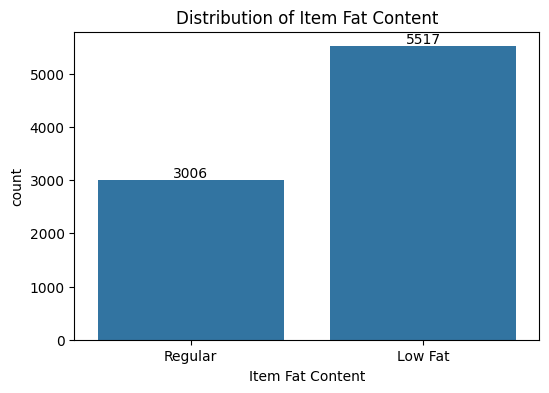

In [153]:
plt.figure(figsize=(6,4))
a=sns.countplot(data=df, x='Item Fat Content')
a.bar_label(a.containers[0])
plt.title('Distribution of Item Fat Content')
plt.show()

Observation:

Count of Low Fat items are more,this means that people focus on healthier products.


2.count of different Outlet Types

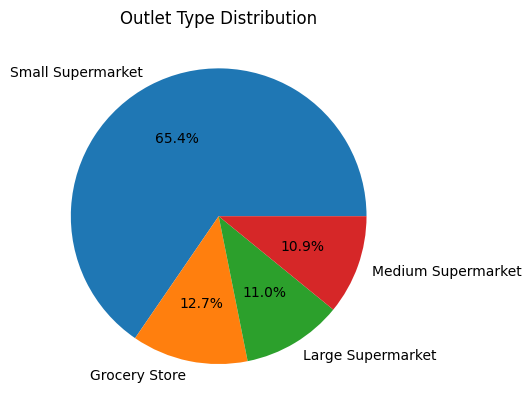

In [154]:
counts = df['Outlet Type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Outlet Type Distribution')
plt.show()

Observation:

Small supermarkets are the most common outlet type.

3.Total sales by Item Type

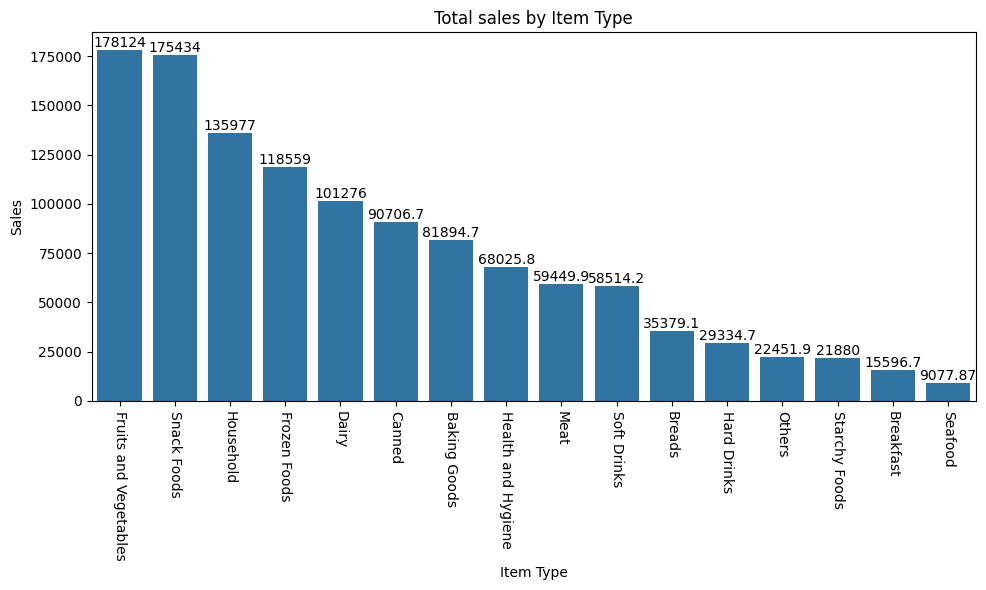

In [155]:
plt.figure(figsize=(10,6))
b=sns.barplot(x=sales_by_itype.index,y=sales_by_itype.values)
b.bar_label(b.containers[0])
plt.xticks(rotation=-90)
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.title("Total sales by Item Type")
plt.tight_layout()
plt.show()

Observation:

The distribution of total sales by item type is positively skewed (right-skewed distribution: Higher values are more on the left).

Fruits and Vegetables and Snack Foods have the highest total sales.

Sales gradually decrease across the item types.




4.fat content by outlet for total sales

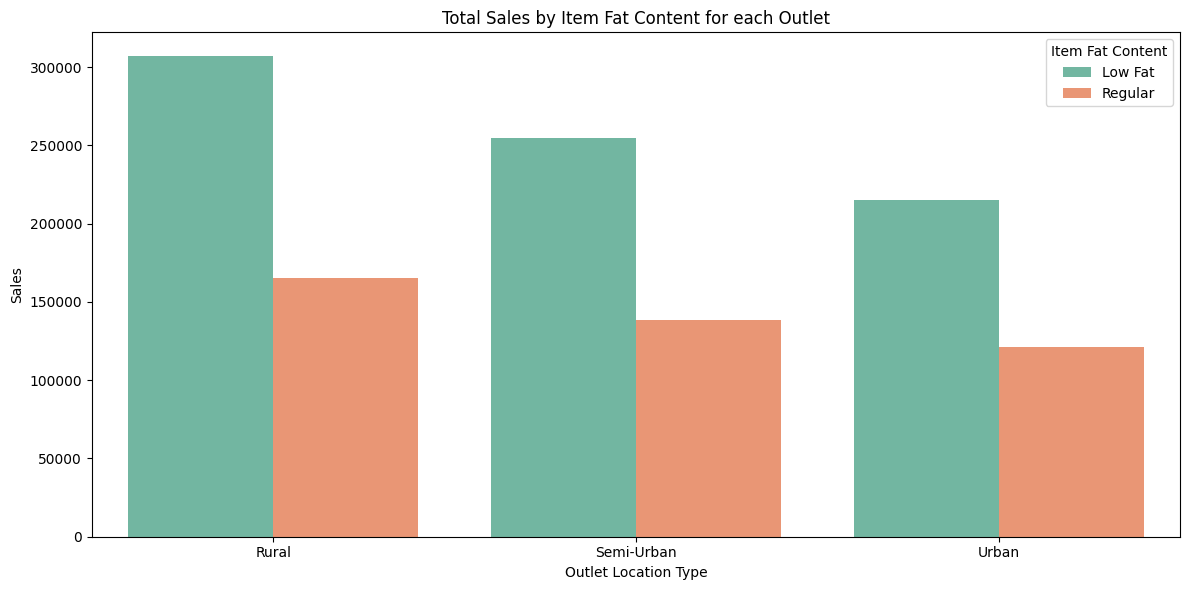

In [156]:
total_sales = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().reset_index()


plt.figure(figsize=(12,6))
sns.barplot(
    data=total_sales,
    x='Outlet Location Type',
    y='Sales',
    hue='Item Fat Content',
    palette='Set2'
)

plt.title("Total Sales by Item Fat Content for each Outlet")
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

Observation:

Low Fat items have higher sales than Regular items in all outlet locations.

Rural outlets have the highest sales.


5.Total sales by Outlet Establishment

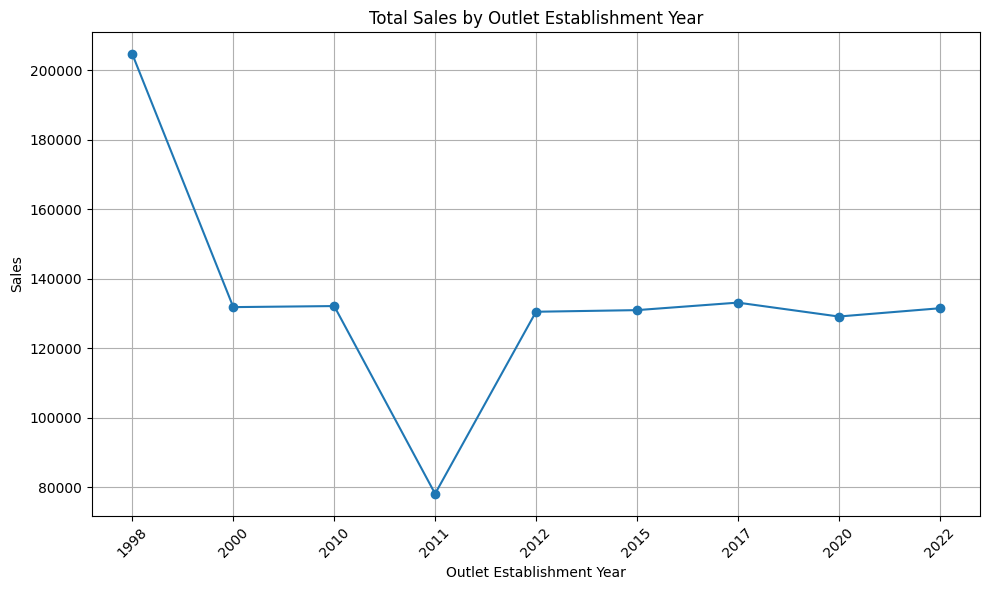

In [157]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xticks(rotation=45)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.title('Total Sales by Outlet Establishment Year')
plt.grid(True)
plt.tight_layout()

Observation:

Outlets established in 1998 had the highest sales.

Sales dropped sharply in 2011.

From 2012 to 2022, sales stayed fairly stable with small ups and downs.

6. Distribution of Item Fat Content by Outlet Fat

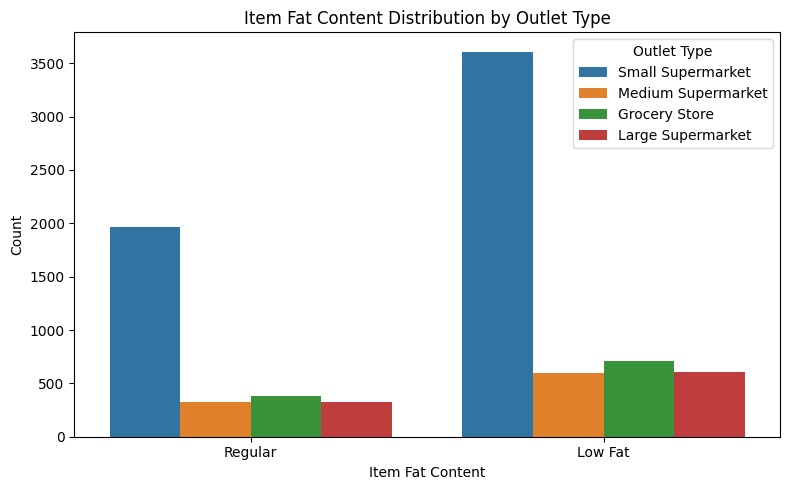

In [158]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Item Fat Content', hue='Outlet Type', data=df)

plt.title('Item Fat Content Distribution by Outlet Type')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Outlet Type')
plt.tight_layout()
plt.show()


Observation:

Small Supermarkets have the highest count of both Regular and Low Fat items, especially in Low Fat.


7.sales by outlet size

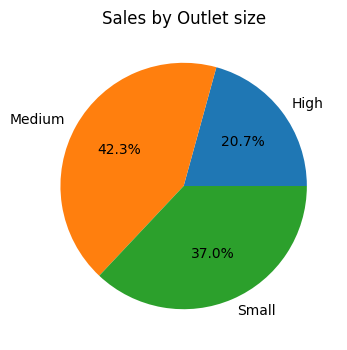

In [159]:
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%.1f%%')
plt.title("Sales by Outlet size")
plt.show()

Observation:

Medium-sized outlets have the highest sales.

High-sized outlets have the lowest sales.

The reason may be 

-->There are less no.of big outlets, so total sales are lower

-->High cost for the products

-->location issue: outlet may be in less accessible areas

-->People like shopping at smaller stores nearby for daily needs

-->Big stores have more expenses, so they may not give many offers.

8.sales by outlet location

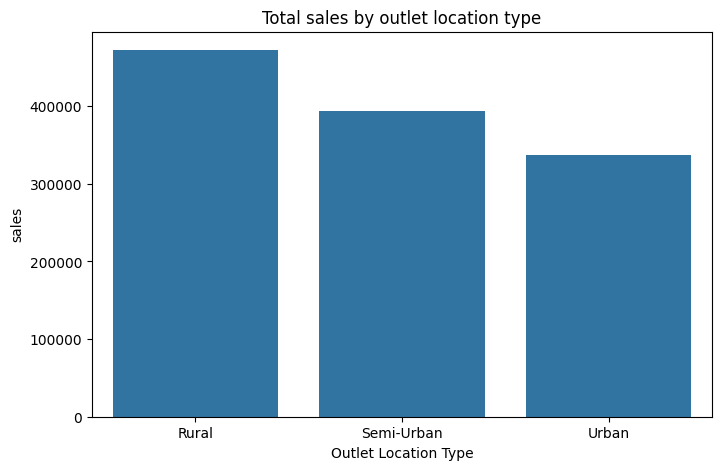

In [160]:
plt.figure(figsize=(8,5))
sns.barplot(y='Sales',x='Outlet Location Type',data=sales_by_loc)
plt.title("Total sales by outlet location type")
plt.ylabel("sales")
plt.xlabel("Outlet Location Type")
plt.show()

Observation:

Rural outlets have the highest total sales 

Reason:

Fewer shops in villages → So, more people buy from the same outlet.

People buy more at once → Because stores are far, they shop in bulk.

Less competition → no stores around it,and more dependency on available stores.

Lower prices → Outlets may sell items at cheaper rates.

More essential items → These outlets focus on daily-use products that sell fast.

In cities, people have many options (malls, online shopping), so sales get divided.
 * more  no.of outlets

 * more competition
 
 * Frequent but smaller purchases.



                            FINAL ANALYSIS                                          

--> Customers prefer healthier options (Low Fat).

--> Rural and medium-sized outlets (balanced in variety, cost, and convenience) have the highest sales.

--> Fewer shops more customers per outlet

--> People shop in bulk due to long distances

--> Less competition and lower prices

--> Focus more on essential products

--> Small supermarkets stock more Low Fat products.

--> High-sized outlets have the lowest sales, possibly due to:

   -- Higher prices

   -- Less accessible locations

   -- Low Fat items have higher sales overall.

   -- Accessible locations combined with the right product choices (like health-conscious items) significantly affect outlet performance.